In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [3]:
df = pd.read_csv('/content/NVDA.csv')

In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,59.560001,60.562500,58.057499,60.049999,59.842804,47053600
1,2020-01-28,60.712502,62.317501,60.177502,61.992500,61.778599,31097600
2,2020-01-29,61.847500,62.209999,60.985001,61.384998,61.173195,25884800
3,2020-01-30,60.402500,61.587502,59.849998,61.452499,61.240456,29050400
4,2020-01-31,60.992500,61.112499,58.687500,59.107498,58.903557,37042000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,171.600006,175.830002,169.750000,170.009995,170.009995,46533800
726,2022-12-12,170.369995,175.380005,167.970001,175.350006,175.350006,45732800
727,2022-12-13,185.309998,187.899994,177.110001,180.720001,180.720001,65658900
728,2022-12-14,179.869995,182.520004,174.199997,176.740005,176.740005,49688800
729,2022-12-15,171.460007,173.199997,167.000000,169.520004,169.520004,47854200


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,162.059935,165.367253,158.545442,162.071801,161.870356,4.660531e+07
std,63.147635,64.524871,61.324267,62.882228,62.867835,1.993747e+07
min,50.025002,52.485001,45.169998,49.099998,48.959850,9.788400e+06
25%,126.620624,128.722500,123.588751,126.236248,125.964739,3.026010e+07
50%,148.536254,152.227501,146.233749,149.162498,148.893097,4.527130e+07
75%,199.907501,203.794998,197.397499,199.981247,199.734722,5.840495e+07
max,335.170013,346.470001,320.359985,333.760010,333.407379,1.463684e+08


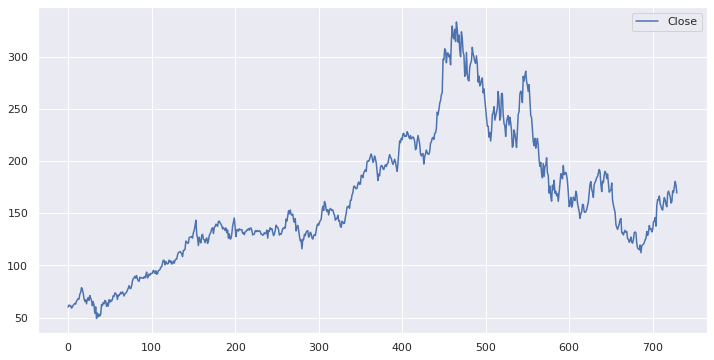

In [7]:
df[['Close']].plot(figsize=(12,6));


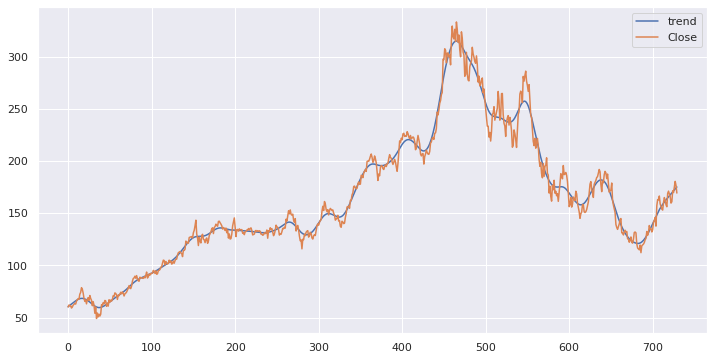

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [9]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.89210984957825,
 0.33578194185271104,
 11,
 718,
 {'1%': -3.439490435810785,
  '5%': -2.8655738086413374,
  '10%': -2.568918067209286},
 4580.721701959468)

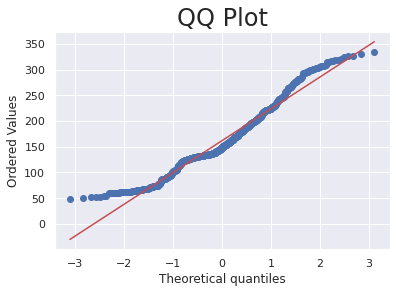

In [10]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [11]:
df['returns'] = df.Close.pct_change(1)*100

In [12]:
df['sq_returns'] = df.returns.mul(df.returns)


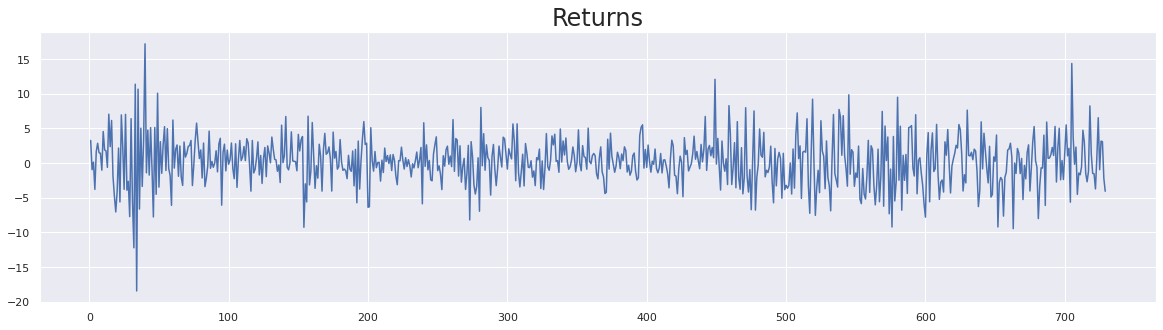

In [13]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


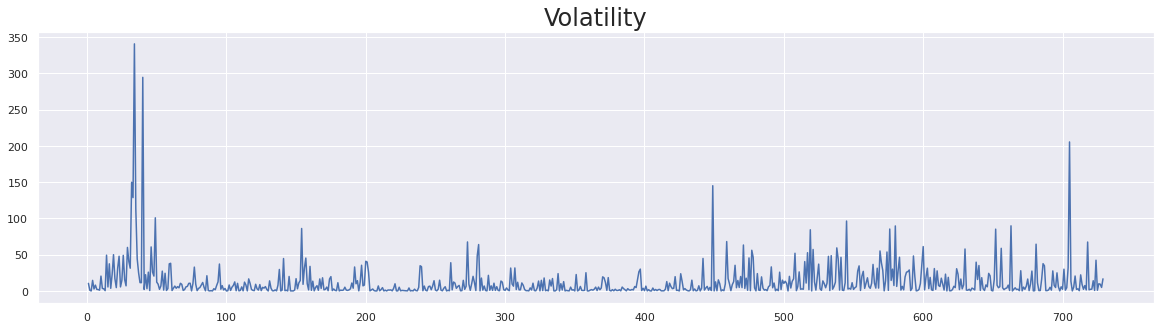

In [14]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

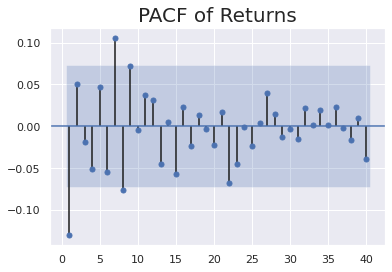

In [15]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

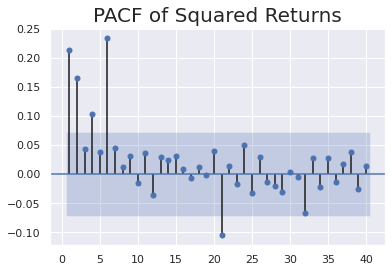

In [16]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [17]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 30.9 MB/s eta 0:00:00


In [18]:
from arch import arch_model


In [19]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [20]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2323.1399405273137
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1977.5863424099289
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1942.5006557866307
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1941.1433370560235
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1941.143337055968
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1941.1433370560235
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1941.14
Distribution:                  Normal   AIC:                           3888.29
Method:            Maximum Likelihood   BIC:                           3902.06
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:05   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2650      0.123      2.151  3.146e-02 [2.356e-02,  0.506]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          9.8855      0.858     11.528  9.587e-31   [  8.205, 11.566]
alpha[1]       0.2163  7.750e-02      2.791  5.249e-03 [6.443e-02,  0.368]
==========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1932.5515810896836
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1932.5515810896836
            Iterations: 6
            Function evaluations: 38
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1932.55
Distribution:                  Normal   AIC:                           3873.10
Method:            Maximum Likelihood   BIC:                           3891.47
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3103      0.123      2.524  1.160e-02 [6.936e-02,  0.551]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          8.1192      0.948      8.564  1.090e-17   [  6.261,  9.977]
alpha[1]       0.1785  7.857e-02      2.272  2.310e-02 [2.451e-02,  0.333]
alpha[2]       0.1872  6.683e-02      2.801  5.096e-03 [5.621e-02,  0.318]
==========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1931.2337257960164
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1930.5136016879453
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1930.51
Distribution:                  Normal   AIC:                           3871.03
Method:            Maximum Likelihood   BIC:                           3893.99
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2963      0.122      2.433  1.497e-02 [5.762e-02,  0.535]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          7.4142      1.038      7.145  9.010e-13    [  5.380,  9.448]
alpha[1]       0.1509  8.283e-02      1.822  6.839e-02 [-1.139e-02,  0.313]
alpha[2]       0.1678  6.074e-02      2.763  5.729e-03  [4.877e-02,  0.287]
alpha[3]       0.1039  7.395e-02      1.406      0.160 [-4.099e-02,  0.249]
===========================================================================

Covariance estimator: robust
"""

In [23]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 10718.961856458707
Iteration:     10,   Func. Count:    174,   Neg. LLF: 1942.05896588844
Iteration:     15,   Func. Count:    261,   Neg. LLF: 1913.9679220944086
Iteration:     20,   Func. Count:    346,   Neg. LLF: 1906.3886598968552
Iteration:     25,   Func. Count:    428,   Neg. LLF: 1900.4988390785538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1900.4988390785538
            Iterations: 26
            Function evaluations: 443
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1900.50
Distribution:                  Normal   AIC:                           3831.00
Method:            Maximum Likelihood   BIC:                           3899.87
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:23   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2328      0.112      2.069  3.850e-02 [1.232e-02,  0.453]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.2419      0.925      3.505  4.559e-04      [  1.429,  5.055]
alpha[1]       0.1050  6.925e-02      1.517      0.129   [-3.067e-02,  0.241]
alpha[2]       0.0564  4.606e-02      1.224      0.221   [-3.389e-02,  0.147]
alpha[3]       0.0450  6.080e-02      0.741      0.459   [-7.412e-02,  0.164]
alpha[4]       0.1784  7.628e-02      2.339  1.935e-02    [2.889e-02,  0.328]
alpha[5]       0.0000  4.100e-02      0.000      1.000 [-8.036e-02,8.036e-02]
alpha[6]       0.0590  4.802e-02      1.229      0.219   [-3.510e-02,  0.153]
alpha[7]       0.1384  6.262e-02      2.210  2.709e-02    [1.567e-02,  0.261]
alpha[8]       0.0450  4.119e-02      1.092      0.275   [-3.576e-02,  0.126]
alpha[9]       0.0324  2.998e-02      1.080      0.280 [-2.638e-02,9.115e-02]
alpha[10]      0.0314  3.337e-02      0.943      0.346 [-3.395e-02,9.684e-02]
alpha[11]  7.3941e-14  3.796e-02  1.948e-12      1.000 [-7.440e-02,7.440e-02]
alpha[12]      0.0234  4.077e-02      0.574      0.566   [-5.649e-02,  0.103]
alpha[13]      0.0428  3.216e-02      1.332      0.183   [-2.019e-02,  0.106]
=============================================================================

Covariance estimator: robust
"""

In [24]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [25]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1909.1986313852046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1909.1956759388604
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1909.20
Distribution:                  Normal   AIC:                           3826.39
Method:            Maximum Likelihood   BIC:                           3844.76
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2603      0.111      2.351  1.873e-02 [4.329e-02,  0.477]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4783      0.216      2.210  2.713e-02 [5.404e-02,  0.903]
alpha[1]       0.1033  2.880e-02      3.588  3.334e-04 [4.688e-02,  0.160]
beta[1]        0.8591  3.451e-02     24.894 8.613e-137   [  0.791,  0.927]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1909.4335187660279
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1909.196276746352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1909.1956763561548
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1909.20
Distribution:                  Normal   AIC:                           3828.39
Method:            Maximum Likelihood   BIC:                           3851.35
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2603      0.113      2.308  2.102e-02 [3.922e-02,  0.481]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4783      0.524      0.912      0.362 [ -0.549,  1.506]
alpha[1]       0.1033      0.126      0.817      0.414 [ -0.145,  0.351]
beta[1]        0.8591      1.450      0.593      0.553 [ -1.982,  3.700]
beta[2]        0.0000      1.290      0.000      1.000 [ -2.528,  2.528]
========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1946.011045205858
Iteration:     10,   Func. Count:     81,   Neg. LLF: 1904.0468728463472
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1904.046447814888
            Iterations: 13
            Function evaluations: 101
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1904.05
Distribution:                  Normal   AIC:                           3820.09
Method:            Maximum Likelihood   BIC:                           3847.64
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:46   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2199      0.109      2.010  4.441e-02 [5.495e-03,  0.434]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5662      0.308      1.839  6.586e-02 [-3.712e-02,  1.169]
alpha[1]       0.1927  5.098e-02      3.779  1.576e-04  [9.273e-02,  0.293]
beta[1]    1.0455e-12  8.543e-02  1.224e-11      1.000    [ -0.167,  0.167]
beta[2]        0.0536  5.269e-02      1.017      0.309 [-4.969e-02,  0.157]
beta[3]        0.7139      0.151      4.741  2.124e-06    [  0.419,  1.009]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1909.20615736613
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1909.1955418640098
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1909.1955418640098
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1909.20
Distribution:                  Normal   AIC:                           3828.39
Method:            Maximum Likelihood   BIC:                           3851.35
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:51   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2603      0.112      2.332  1.969e-02 [4.155e-02,  0.479]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4799      0.248      1.931  5.342e-02 [-7.073e-03,  0.967]
alpha[1]       0.1026  7.196e-02      1.426      0.154 [-3.844e-02,  0.244]
alpha[2]   9.8197e-04  7.865e-02  1.249e-02      0.990    [ -0.153,  0.155]
beta[1]        0.8587  4.136e-02     20.763  9.418e-96    [  0.778,  0.940]
===========================================================================

Covariance estimator: robust
"""

In [29]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1920.2897113094882
Iteration:     10,   Func. Count:     81,   Neg. LLF: 1910.2348542119644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1909.1301720469874
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1909.13
Distribution:                  Normal   AIC:                           3830.26
Method:            Maximum Likelihood   BIC:                           3857.81
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:37:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2570      0.112      2.295  2.171e-02 [3.757e-02,  0.476]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5255      0.286      1.840  6.578e-02 [-3.427e-02,  1.085]
alpha[1]       0.0947  6.973e-02      1.358      0.174 [-4.196e-02,  0.231]
alpha[2]   7.2456e-15  8.399e-02  8.627e-14      1.000    [ -0.165,  0.165]
alpha[3]       0.0175  5.885e-02      0.297      0.766 [-9.784e-02,  0.133]
beta[1]        0.8466  5.115e-02     16.552  1.549e-61    [  0.746,  0.947]
===========================================================================

Covariance estimator: robust
"""

In [30]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [31]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2662.020416993172
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1906.0875293058054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1906.0875150633726
            Iterations: 12
            Function evaluations: 88
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1906.09
Distribution:                  Normal   AIC:                           3822.18
Method:            Maximum Likelihood   BIC:                           3845.13
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:38:16   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2005      0.113      1.779  7.518e-02 [-2.035e-02,  0.421]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1347  5.367e-02      2.509  1.210e-02 [2.948e-02,  0.240]
alpha[1]       0.2106  5.255e-02      4.008  6.121e-05   [  0.108,  0.314]
gamma[1]      -0.0288  3.848e-02     -0.750      0.454 [ -0.104,4.658e-02]
beta[1]        0.9457  2.120e-02     44.602      0.000   [  0.904,  0.987]
==========================================================================

Covariance estimator: robust
"""

In [32]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [33]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1907.39
Distribution:                  Normal   AIC:                           3824.78
Method:            Maximum Likelihood   BIC:                           3847.74
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:38:30   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2200      0.114      1.934  5.307e-02 [-2.916e-03,  0.443]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6596      0.392      1.684  9.224e-02    [ -0.108,  1.427]
alpha[1]       0.0569  3.755e-02      1.515      0.130 [-1.671e-02,  0.131]
gamma[1]       0.0911  7.705e-02      1.182      0.237 [-5.995e-02,  0.242]
beta[1]        0.8437  5.344e-02     15.788  3.771e-56    [  0.739,  0.948]
===========================================================================

Covariance estimator: robust
"""

In [34]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [35]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1907.300397142356
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1904.9384951360066
Iteration:     15,   Func. Count:    110,   Neg. LLF: 1904.9385619158616
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1904.9380877014373
            Iterations: 15
            Function evaluations: 113
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1904.94
Distribution:                  Normal   AIC:                           3819.88
Method:            Maximum Likelihood   BIC:                           3842.83
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:38:42   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2002  9.731e-04    205.775      0.000 [  0.198,  0.202]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1981  7.224e-02      2.742  6.116e-03  [5.646e-02,  0.340]
alpha[1]       0.0995  3.525e-02      2.821  4.782e-03  [3.037e-02,  0.169]
gamma[1]       0.0326  4.503e-02      0.723      0.469 [-5.568e-02,  0.121]
beta[1]        0.8514  3.283e-02     25.930 3.019e-148    [  0.787,  0.916]
===========================================================================

Covariance estimator: robust
"""

In [36]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [37]:
from arch.univariate import FIGARCH

In [38]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1911.4787571749
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1911.4676616580618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1911.4676616580145
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1911.47
Distribution:                  Normal   AIC:                           3832.94
Method:            Maximum Likelihood   BIC:                           3855.89
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:38:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2503      0.112      2.238  2.524e-02 [3.107e-02,  0.470]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3288      0.211      1.556      0.120 [-8.546e-02,  0.743]
phi            0.1879      0.151      1.246      0.213    [ -0.108,  0.484]
d              0.6242      0.294      2.124  3.367e-02  [4.822e-02,  1.200]
beta           0.6982      0.172      4.049  5.138e-05    [  0.360,  1.036]
===========================================================================

Covariance estimator: robust
"""

In [39]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [40]:
from arch.univariate import HARCH

In [41]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 1946.6817179563232
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1941.1498333421364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1941.1433369020551
            Iterations: 14
            Function evaluations: 65
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1941.14
Distribution:                  Normal   AIC:                           3888.29
Method:            Maximum Likelihood   BIC:                           3902.06
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:39:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2650      0.123      2.151  3.144e-02 [2.359e-02,  0.506]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          9.8857      0.858     11.527  9.595e-31   [  8.205, 11.567]
alpha[1]       0.2163  7.749e-02      2.791  5.250e-03 [6.442e-02,  0.368]
==========================================================================

Covariance estimator: robust
"""

In [42]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [43]:
from arch.univariate import APARCH


In [44]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2052.51498011056
Iteration:     10,   Func. Count:     84,   Neg. LLF: 2038.3221968741977
Iteration:     15,   Func. Count:    122,   Neg. LLF: 1906.0820764696336
Iteration:     20,   Func. Count:    161,   Neg. LLF: 1906.5607633014033
Iteration:     25,   Func. Count:    201,   Neg. LLF: 2583.5634910882823
Iteration:     30,   Func. Count:    242,   Neg. LLF: 1904.8308989011746
Iteration:     35,   Func. Count:    284,   Neg. LLF: 1904.743494970489
Iteration:     40,   Func. Count:    321,   Neg. LLF: 2012.4135053638383
Iteration:     45,   Func. Count:    372,   Neg. LLF: 1916.4625072178353
Iteration:     50,   Func. Count:    412,   Neg. LLF: 1904.680097786154
Iteration:     55,   Func. Count:    453,   Neg. LLF: 1904.2871473784298
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1904.287147460157
            Iterations: 56
            Function evaluations: 470
            Gradient evaluat

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1904.29
Distribution:                  Normal   AIC:                           3820.57
Method:            Maximum Likelihood   BIC:                           3848.12
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:39:31   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2002  1.195e-02     16.758  4.932e-63 [  0.177,  0.224]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0753  1.743e-02      4.323  1.541e-05  [4.118e-02,  0.109]
alpha[1]       0.0759  4.780e-02      1.588      0.112 [-1.780e-02,  0.170]
gamma[1]      -0.1521      3.689 -4.122e-02      0.967    [ -7.383,  7.079]
beta[1]        0.8557  2.421e-02     35.347 1.109e-273    [  0.808,  0.903]
delta          0.0500  4.835e-02      1.034      0.301 [-4.477e-02,  0.145]
===========================================================================

Covariance estimator: robust
"""

In [45]:
from scipy import stats


In [46]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=38.34662442692383, pvalue=4.7112517220782024e-09)

In [47]:
jarque_bera_test.statistic

38.34662442692383

In [48]:
jarque_bera_test.pvalue

4.7112517220782024e-09

jarquer-bera para los retornos

In [49]:
returns = df.returns[1:]
returns

1      3.234806
2     -0.979960
3      0.109963
4     -3.815957
5      1.649540
         ...   
725   -0.978512
726    3.140998
727    3.062444
728   -2.202300
729   -4.085097
Name: returns, Length: 729, dtype: float64

In [50]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=128.3565253501507, pvalue=0.0)

In [51]:
jarque_bera_test.statistic

128.3565253501507

In [52]:
jarque_bera_test.pvalue

0.0

curtosis

In [53]:
returns.kurt()

2.076394811603621

coef. asimetria

In [54]:
returns.skew()

0.041832733077558616

In [55]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -30.545
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.910
P-value                         0.004
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.468
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [58]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.323
P-value                         0.117
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [60]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [63]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [64]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [65]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [67]:
data = pd.read_csv("/content/NVDA.csv")

In [68]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,59.560001,60.562500,58.057499,60.049999,59.842804,47053600
1,2020-01-28,60.712502,62.317501,60.177502,61.992500,61.778599,31097600
2,2020-01-29,61.847500,62.209999,60.985001,61.384998,61.173195,25884800
3,2020-01-30,60.402500,61.587502,59.849998,61.452499,61.240456,29050400
4,2020-01-31,60.992500,61.112499,58.687500,59.107498,58.903557,37042000
...,...,...,...,...,...,...,...
725,2022-12-09,171.600006,175.830002,169.750000,170.009995,170.009995,46533800
726,2022-12-12,170.369995,175.380005,167.970001,175.350006,175.350006,45732800
727,2022-12-13,185.309998,187.899994,177.110001,180.720001,180.720001,65658900
728,2022-12-14,179.869995,182.520004,174.199997,176.740005,176.740005,49688800


In [69]:
data = data[["Date","Close","Volume"]]


In [70]:
data

,Date,Close,Volume
0,2020-01-27,60.049999,47053600
1,2020-01-28,61.992500,31097600
2,2020-01-29,61.384998,25884800
3,2020-01-30,61.452499,29050400
4,2020-01-31,59.107498,37042000
...,...,...,...
725,2022-12-09,170.009995,46533800
726,2022-12-12,175.350006,45732800
727,2022-12-13,180.720001,65658900
728,2022-12-14,176.740005,49688800


In [71]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,60.049999,47053600,61.992500
1,2020-01-28,61.992500,31097600,61.384998
2,2020-01-29,61.384998,25884800,61.452499
3,2020-01-30,61.452499,29050400,59.107498
4,2020-01-31,59.107498,37042000,60.082500
...,...,...,...,...
725,2022-12-09,170.009995,46533800,175.350006
726,2022-12-12,175.350006,45732800,180.720001
727,2022-12-13,180.720001,65658900,176.740005
728,2022-12-14,176.740005,49688800,169.520004


In [72]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,60.049999,47053600,61.992500
1,2020-01-28,61.992500,31097600,61.384998
2,2020-01-29,61.384998,25884800,61.452499
3,2020-01-30,61.452499,29050400,59.107498
4,2020-01-31,59.107498,37042000,60.082500
...,...,...,...,...
724,2022-12-08,171.690002,51545600,170.009995
725,2022-12-09,170.009995,46533800,175.350006
726,2022-12-12,175.350006,45732800,180.720001
727,2022-12-13,180.720001,65658900,176.740005


In [73]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [74]:
price_volume_target_scaled_df

array([[0.03846694, 0.27284522, 0.04529088],
       [0.04529088, 0.15601992, 0.04315675],
       [0.04315675, 0.11785327, 0.04339388],
       ...,
       [0.44351157, 0.2631747 , 0.46237616],
       [0.46237616, 0.40906795, 0.44839458],
       [0.44839458, 0.29213941, 0.42303099]])

In [75]:
price_volume_target_scaled_df.shape

(729, 3)

In [76]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [77]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [78]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [79]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [80]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

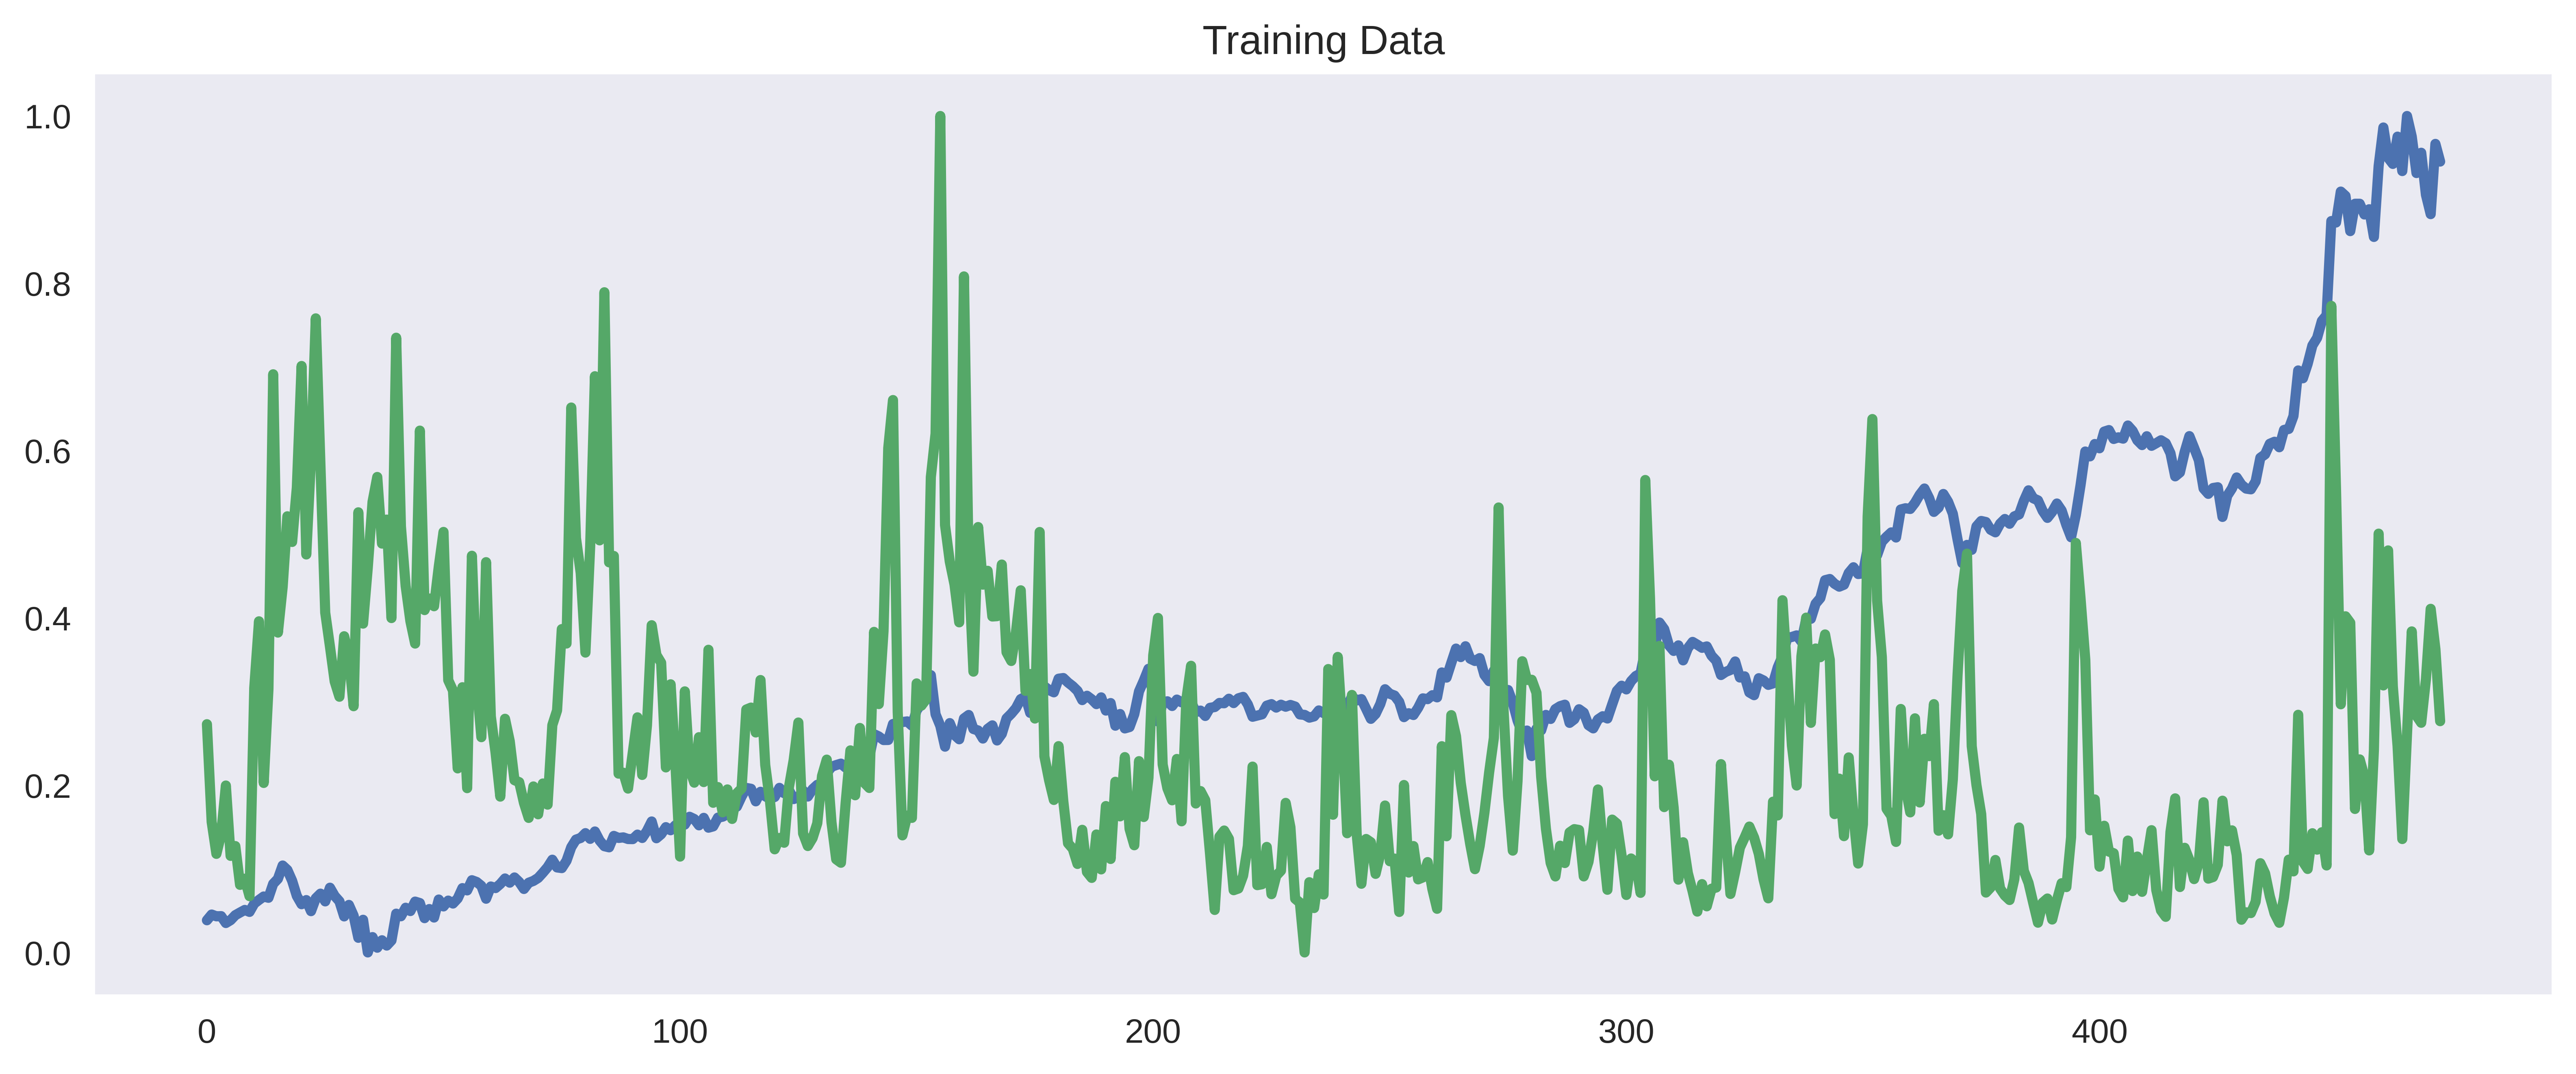

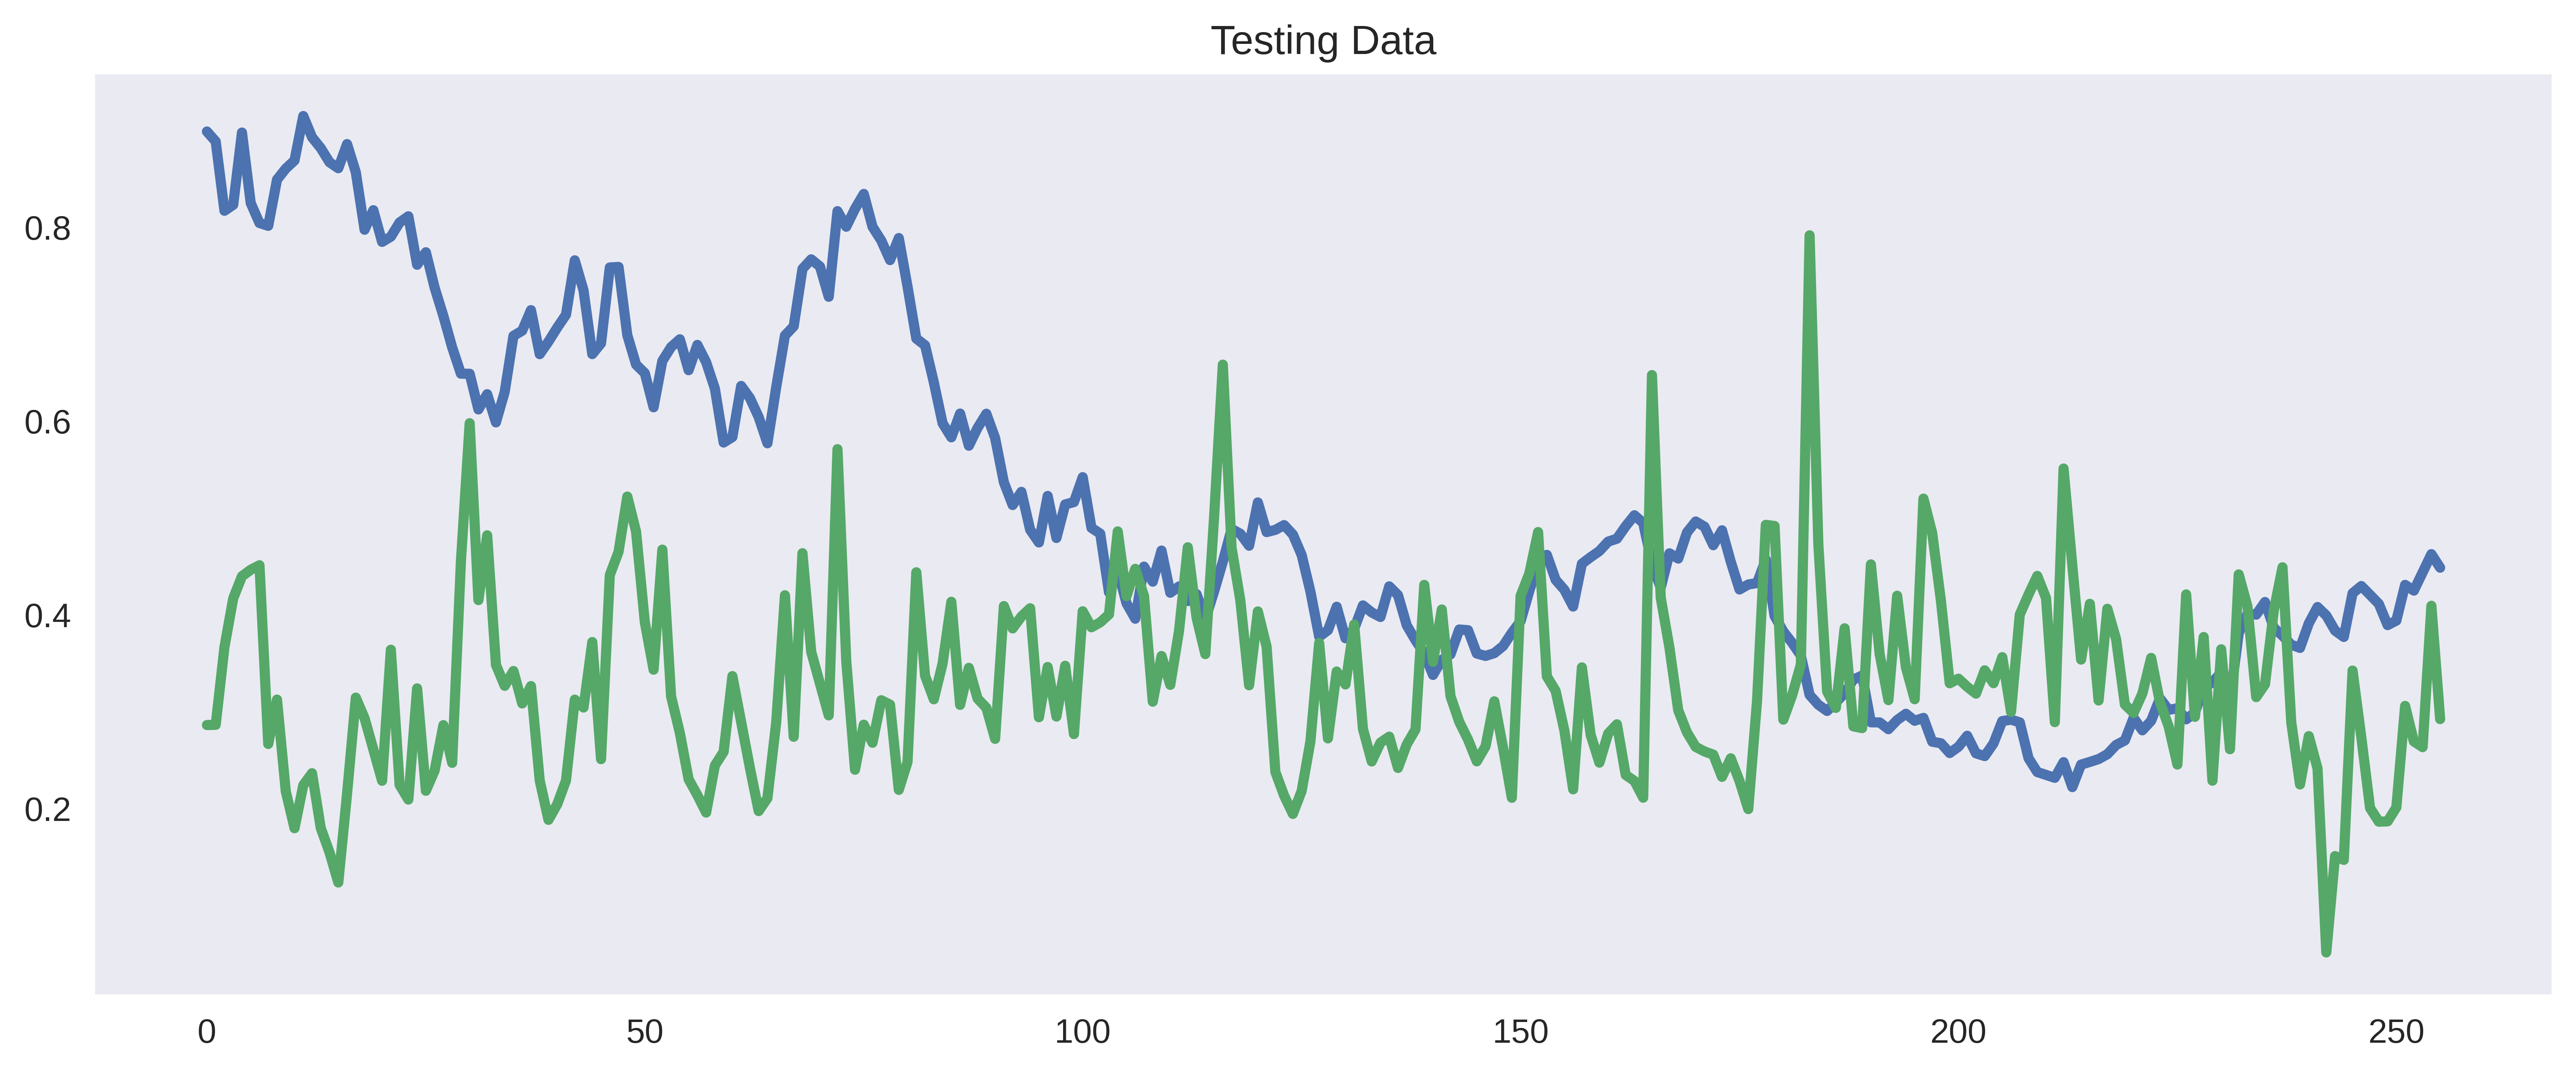

In [81]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [82]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [83]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.975776807456846


In [84]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.05279283],
       [0.06091587],
       [0.05939623],
       [0.05930632],
       [0.05062772],
       [0.05505277],
       [0.06060479],
       [0.06428747],
       [0.06711833],
       [0.06516943],
       [0.07132828],
       [0.07437102],
       [0.08091731],
       [0.07790448],
       [0.08873107],
       [0.09864577],
       [0.11313265],
       [0.106935  ],
       [0.09506494],
       [0.07671388],
       [0.0652941 ],
       [0.07307712],
       [0.05884778],
       [0.07125287],
       [0.07902138],
       [0.07254862],
       [0.08874322],
       [0.07988967],
       [0.07404906],
       [0.05575743],
       [0.06923005],
       [0.05776512],
       [0.02926392],
       [0.05168664],
       [0.01343594],
       [0.02989931],
       [0.01735499],
       [0.0269689 ],
       [0.02051279],
       [0.02795065],
       [0.05402181],
       [0.05411505],
       [0.06484937],
       [0.06163412],
       [0.07280225],
       [0.06765196],
       [0.05333895],
       [0.063

In [85]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [86]:
len(Predicted)

729

In [87]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [88]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [89]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.038467
1,2020-01-28,0.045291
2,2020-01-29,0.043157
3,2020-01-30,0.043394
4,2020-01-31,0.035156
...,...,...
724,2022-12-08,0.430654
725,2022-12-09,0.424752
726,2022-12-12,0.443512
727,2022-12-13,0.462376


In [90]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.038467,0.052793
1,2020-01-28,0.045291,0.060916
2,2020-01-29,0.043157,0.059396
3,2020-01-30,0.043394,0.059306
4,2020-01-31,0.035156,0.050628
...,...,...,...
724,2022-12-08,0.430654,0.427447
725,2022-12-09,0.424752,0.422304
726,2022-12-12,0.443512,0.440326
727,2022-12-13,0.462376,0.456375


In [91]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [92]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [93]:
data

,Date,Close,Volume,Target
0,2020-01-27,60.049999,47053600,61.992500
1,2020-01-28,61.992500,31097600,61.384998
2,2020-01-29,61.384998,25884800,61.452499
3,2020-01-30,61.452499,29050400,59.107498
4,2020-01-31,59.107498,37042000,60.082500
...,...,...,...,...
725,2022-12-09,170.009995,46533800,175.350006
726,2022-12-12,175.350006,45732800,180.720001
727,2022-12-13,180.720001,65658900,176.740005
728,2022-12-14,176.740005,49688800,169.520004


In [94]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,60.049999,47053600,61.992500
1,2020-01-28,61.992500,31097600,61.384998
2,2020-01-29,61.384998,25884800,61.452499
3,2020-01-30,61.452499,29050400,59.107498
4,2020-01-31,59.107498,37042000,60.082500
...,...,...,...,...
725,2022-12-09,170.009995,46533800,175.350006
726,2022-12-12,175.350006,45732800,180.720001
727,2022-12-13,180.720001,65658900,176.740005
728,2022-12-14,176.740005,49688800,169.520004


In [95]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[6.00499990e+01, 4.70536000e+07],
       [6.19925000e+01, 3.10976000e+07],
       [6.13849980e+01, 2.58848000e+07],
       ...,
       [1.80720001e+02, 6.56589000e+07],
       [1.76740005e+02, 4.96888000e+07],
       [1.69520004e+02, 4.78542000e+07]])

In [96]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [97]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [98]:
X

[array([0.03846694]),
 array([0.04529088]),
 array([0.04315675]),
 array([0.04339388]),
 array([0.03515597]),
 array([0.03858112]),
 array([0.04455316]),
 array([0.04774117]),
 array([0.05080623]),
 array([0.04847011]),
 array([0.05846449]),
 array([0.06278545]),
 array([0.06686926]),
 array([0.06532355]),
 array([0.08201891]),
 array([0.08797338]),
 array([0.10389589]),
 array([0.09862644]),
 array([0.08577778]),
 array([0.06751915]),
 array([0.0576565]),
 array([0.06257465]),
 array([0.04935714]),
 array([0.0647]),
 array([0.0702856]),
 array([0.06102897]),
 array([0.0773818]),
 array([0.06752794]),
 array([0.06116069]),
 array([0.04306893]),
 array([0.0568046]),
 array([0.04397352]),
 array([0.01748578]),
 array([0.03902902]),
 array([0.]),
 array([0.01832889]),
 array([0.00563832]),
 array([0.01455245]),
 array([0.00821156]),
 array([0.01430655]),
 array([0.04635354]),
 array([0.04322701]),
 array([0.05343216]),
 array([0.0494713]),
 array([0.06076548]),
 array([0.05901779]),
 arra

In [99]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [100]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [101]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [102]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [103]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 7s 122ms/step - loss: 0.0771 - val_loss: 0.3867
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0248 - val_loss: 0.0721
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0162 - val_loss: 0.1561
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0122 - val_loss: 0.0750
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0081 - val_loss: 0.0422
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 7/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 8/20
13/13 [==============================] - 0s 11ms/step - loss: 8.7260e-04 - val_loss: 0.0072
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 7.1986e-04 - val_loss: 0.0045
Epoch 10/20
13/13 [==============================] - 0s 10ms/step - loss: 6.1896e-04 - val_loss: 0.0

In [104]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 5ms/step


In [105]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [106]:
test_predicted

[0.04202295,
 0.04834611,
 0.046367064,
 0.046586886,
 0.03896009,
 0.042128637,
 0.047661833,
 0.050620046,
 0.053467076,
 0.05129687,
 0.060593095,
 0.0646216,
 0.06843422,
 0.06699057,
 0.08262192,
 0.08821724,
 0.103231736,
 0.09825438,
 0.086152844,
 0.069041416,
 0.059840415,
 0.06442495,
 0.05212072,
 0.06640839,
 0.07162759,
 0.06298332,
 0.07827189,
 0.06904964,
 0.06310615,
 0.046285667,
 0.05904705,
 0.04712431,
 0.022670751,
 0.04254324,
 0.0066458937,
 0.02344581,
 0.01180284,
 0.019975932,
 0.01415965,
 0.019750144,
 0.04933206,
 0.0464322,
 0.05590851,
 0.05222676,
 0.06273764,
 0.06110863,
 0.044356886,
 0.054463007,
 0.04504035,
 0.0650395,
 0.057371102,
 0.06385149,
 0.060576733,
 0.06622802,
 0.077810906,
 0.0752521,
 0.086672924,
 0.0847086,
 0.08036369,
 0.06594929,
 0.07962233,
 0.077860296,
 0.08245703,
 0.08863857,
 0.08391663,
 0.08977891,
 0.084675595,
 0.076848,
 0.0838589,
 0.08588043,
 0.08922522,
 0.0950815,
 0.10140574,
 0.109814554,
 0.10107386,
 0.10032

In [107]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [108]:
df_predicted['predictions'] = test_predicted

In [109]:
df_predicted

,Date,predictions
1,2020-01-28,0.042023
2,2020-01-29,0.048346
3,2020-01-30,0.046367
4,2020-01-31,0.046587
5,2020-02-03,0.038960
...,...,...
725,2022-12-09,0.427358
726,2022-12-12,0.421249
727,2022-12-13,0.440697
728,2022-12-14,0.460342


In [110]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [111]:
df_predicted['Close'] = close[1:]

In [112]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.042023,0.045291
2,2020-01-29,0.048346,0.043157
3,2020-01-30,0.046367,0.043394
4,2020-01-31,0.046587,0.035156
5,2020-02-03,0.038960,0.038581
...,...,...,...
725,2022-12-09,0.427358,0.424752
726,2022-12-12,0.421249,0.443512
727,2022-12-13,0.440697,0.462376
728,2022-12-14,0.460342,0.448395


In [113]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")